# Financial analysis project that involves fetching historical data for Bitcoin (BTC) using Yahoo Finance (yfinance), combining it with sentiment analysis data from Wikipedia edits, and training a machine learning model (Random Forest and XGBoost classifiers) for predicting Bitcoin price movements. Let's break down the script step by step:

1. Data Retrieval and Cleaning

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [77]:
import yfinance as yf
import os
import pandas as pd

In [78]:
import yfinance as yf
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [261]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [262]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-04 00:00:00+00:00,34736.324219,35256.031250,34616.691406,35082.195312,9561294264,0.0,0.0
2023-11-05 00:00:00+00:00,35090.011719,35340.339844,34594.242188,35049.355469,12412743996,0.0,0.0
2023-11-06 00:00:00+00:00,35044.789062,35286.027344,34765.363281,35037.371094,12693436420,0.0,0.0


In [263]:
del btc["Dividends"]
del btc["Stock Splits"]

In [264]:
btc.columns = [c.lower() for c in btc.columns]

In [265]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-11-04 00:00:00+00:00,34736.324219,35256.031250,34616.691406,35082.195312,9561294264
2023-11-05 00:00:00+00:00,35090.011719,35340.339844,34594.242188,35049.355469,12412743996
2023-11-06 00:00:00+00:00,35044.789062,35286.027344,34765.363281,35037.371094,12693436420


In [266]:
btc.index = pd.to_datetime(btc.index)

# can use strftime to format the index
btc.index = btc.index.strftime('%Y-%m-%d %H:%M:%S+00:00')

# Display the DataFrame
print(btc)

                                   open          high           low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-11-04 00:00:00+00:00  34736.324219  35256.031250  34616.691406   
2023-11-05 00:00:00+00:00  35090.011719  35340.339844  34594.242188   
2023-11-06 00:00:00+00:00  35044.789062  35286.027344  34765.363281   
2023-11-07 00:00:00+00:00  35047.792969  35892.417969  34545.816406   
2023-11-08 00:00:00+00:00  35419.476562  35452.105469  35159.812500   

                                  close       volume  
Date                 

This section installs the required library (yfinance), fetches historical data for Bitcoin, loads or creates a CSV file to store the data, and cleans up the DataFrame.

<AxesSubplot:xlabel='Date'>

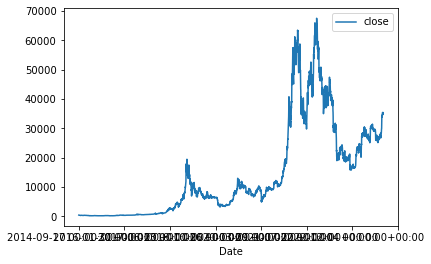

In [267]:
btc.plot.line(y="close", use_index=True)

2. Wikipedia Sentiment Analysis Data

In [268]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [269]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-11-04,0.966667,-0.022490,0.174359
2023-11-05,1.000000,-0.049592,0.207692
2023-11-06,1.000000,-0.049592,0.207692
2023-11-07,1.000000,-0.049592,0.207692


In [270]:
wiki = wiki.loc['2014-09-17':]

In [271]:
wiki.index = pd.to_datetime(wiki.index)

# Now you can use strftime to format the index
wiki.index = wiki.index.strftime('%Y-%m-%d %H:%M:%S+00:00')

# Display the DataFrame
print(wiki)

                           edit_count  sentiment  neg_sentiment
2014-09-17 00:00:00+00:00    5.033333  -0.232191       0.532718
2014-09-18 00:00:00+00:00    5.066667  -0.232760       0.532718
2014-09-19 00:00:00+00:00    5.200000  -0.235415       0.549385
2014-09-20 00:00:00+00:00    5.200000  -0.233185       0.549385
2014-09-21 00:00:00+00:00    5.233333  -0.204017       0.532718
...                               ...        ...            ...
2023-11-04 00:00:00+00:00    0.966667  -0.022490       0.174359
2023-11-05 00:00:00+00:00    1.000000  -0.049592       0.207692
2023-11-06 00:00:00+00:00    1.000000  -0.049592       0.207692
2023-11-07 00:00:00+00:00    1.000000  -0.049592       0.207692
2023-11-08 00:00:00+00:00    1.000000  -0.049432       0.207692

[3340 rows x 3 columns]


Reads sentiment analysis data from a CSV file ("wikipedia_edits.csv") containing information about Wikipedia edits, filters data from a specific date, and processes the index.

In [272]:
btc.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [273]:
wiki.columns

Index(['edit_count', 'sentiment', 'neg_sentiment'], dtype='object')

In [274]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-11-04 00:00:00+00:00,34736.324219,35256.031250,34616.691406,35082.195312,9561294264
2023-11-05 00:00:00+00:00,35090.011719,35340.339844,34594.242188,35049.355469,12412743996
2023-11-06 00:00:00+00:00,35044.789062,35286.027344,34765.363281,35037.371094,12693436420


3. Merging Bitcoin and Wikipedia Data

In [276]:
btc = btc.merge(wiki, left_index=True, right_index=True)
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
Date,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-11-04 00:00:00+00:00,34736.324219,35256.031250,34616.691406,35082.195312,9561294264,0.966667,-0.022490,0.174359
2023-11-05 00:00:00+00:00,35090.011719,35340.339844,34594.242188,35049.355469,12412743996,1.000000,-0.049592,0.207692
2023-11-06 00:00:00+00:00,35044.789062,35286.027344,34765.363281,35037.371094,12693436420,1.000000,-0.049592,0.207692


Merges the Bitcoin and Wikipedia DataFrames based on their indexes.

4. Target Variable Creation

In [277]:
btc["tomorrow"] = btc["close"].shift(-1)

In [278]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

Creates a target variable based on the closing price of Bitcoin to predict whether the price will increase or decrease.

In [279]:
btc["target"].value_counts()

1    1765
0    1575
Name: target, dtype: int64

In [280]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
Date,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-11-04 00:00:00+00:00,34736.324219,35256.031250,34616.691406,35082.195312,9561294264,0.966667,-0.022490,0.174359,35049.355469,0
2023-11-05 00:00:00+00:00,35090.011719,35340.339844,34594.242188,35049.355469,12412743996,1.000000,-0.049592,0.207692,35037.371094,0
2023-11-06 00:00:00+00:00,35044.789062,35286.027344,34765.363281,35037.371094,12693436420,1.000000,-0.049592,0.207692,35443.562500,1


5. Machine Learning Model Training

In [287]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-3000]
test = btc.iloc[-3000:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

Imports a machine learning model (Random Forest Classifier), trains the model on a subset of the data, and defines predictors.



6. Model Evaluation

In [288]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.6333333333333333

Evaluates the model's precision on the test set.

In [289]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [290]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [291]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [292]:
predictions["predictions"].value_counts()

1    1322
0     923
Name: predictions, dtype: int64

In [293]:
precision_score(predictions["target"], predictions["predictions"])

0.4924357034795764

In [294]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [295]:
btc, new_predictors = compute_rolling(btc.copy())

7. Backtesting and Time Series Analysis

In [296]:
predictions = backtest(btc, model, new_predictors)

In [297]:
precision_score(predictions["target"], predictions["predictions"])

0.5323801513877208

Backtests the model on different subsets of data, computes rolling averages, and additional features, and evaluates the precision of predictions.

8. Additional Analysis

In [298]:
predictions

,target,predictions
Date,,
2017-09-16 00:00:00+00:00,0,1
2017-09-17 00:00:00+00:00,1,0
2017-09-18 00:00:00+00:00,0,0
2017-09-19 00:00:00+00:00,0,1
2017-09-20 00:00:00+00:00,0,1
...,...,...
2023-11-04 00:00:00+00:00,0,0
2023-11-05 00:00:00+00:00,0,0
2023-11-06 00:00:00+00:00,1,0


Displays the predictions DataFrame.

This script combines financial data with sentiment analysis from Wikipedia edits to train a machine learning model for predicting Bitcoin price movements. It also incorporates backtesting and time series analysis to assess the model's performance.